In [1]:
import numpy as np
from keras.models import Model
import cv2
from keras.models import load_model

In [2]:
autoencoder = load_model("../weights/autoencoder_fashion_data.h5")
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

In [3]:
learned_codes = np.load("../weights/saved_features.npy")
X_test_clothes=np.load("../weights/X_train_clothes.npy")
y_test_clothes=np.load("../weights/y_train_clothes_new.npy")

In [4]:
def retrieve_closest_images(test_element, test_label, n_samples=5):

    test_code = encoder.predict(np.array([test_element]))
    test_code = test_code.reshape(test_code.shape[1] * test_code.shape[2] * test_code.shape[3])

    distances = []

    for code in learned_codes:
        #Getting the L2 Norm.
        distance = np.linalg.norm(code - test_code)
        distances.append(distance)
    nb_elements = learned_codes.shape[0]
    distances = np.array(distances)
    learned_code_index = np.arange(nb_elements)
    labels = np.copy(y_test_clothes).astype('float32')
    labels[labels != test_label] = -1
    labels[labels == test_label] = 1
    labels[labels == -1] = 0
    distance_with_labels = np.stack((distances, labels, learned_code_index), axis=-1)
    sorted_distance_with_labels = distance_with_labels[distance_with_labels[:, 0].argsort()]

    sorted_distances = 28 - sorted_distance_with_labels[:, 0]
    sorted_labels = sorted_distance_with_labels[:, 1]
    sorted_indexes = sorted_distance_with_labels[:, 2]
    kept_indexes = sorted_indexes[:n_samples]

    #score = label_ranking_average_precision_score(np.array([sorted_labels[:n_samples]]), np.array([sorted_distances[:n_samples]]))

   # print("Average precision ranking score for tested element is {}".format(score))

    original_image = test_element
    cv2.imshow('query',original_image)
    retrieved_images = X_test_clothes[int(kept_indexes[0]), :]
    for i in range(1, n_samples):
        retrieved_images = np.hstack((retrieved_images, X_test_clothes[int(kept_indexes[i]), :]))
    cv2.imshow('retrieval',retrieved_images)
    cv2.waitKey(0)

    cv2.imwrite('test_results/original_image.jpg', 255 * cv2.resize(original_image, (0,0), fx=3, fy=3))
    cv2.imwrite('test_results/retrieved_results.jpg', 255 * cv2.resize(retrieved_images, (0,0), fx=2, fy=2))

In [5]:
retrieve_closest_images(X_test_clothes[12], y_test_clothes[1])

In [6]:
op=encoder.predict(np.array([X_test_clothes[12]]))

In [7]:
op.shape

(1, 19, 19, 8)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img_filters=op.reshape(19,19,8)

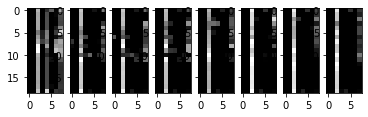

In [15]:
for i in range(8):
    
    plt.subplot(1, 8, i+1)
    plt.imshow(img_filters[i],cmap='gray')



In [71]:
img=op.reshape(38,76,-1)


In [75]:
image=cv2.resize(img, (300,300),interpolation = cv2.INTER_AREA)

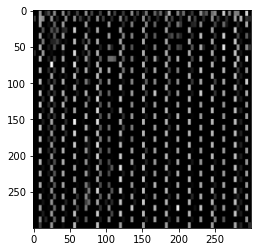

In [76]:
plt.imshow(image,cmap='gray')